In [1]:
import pandas as pd
import numpy as np
import scipy as sp
## for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/roadsafety-accidents/DfTRoadSafety_Accidents_2014.csv


In [3]:
data_directory="../input/roadsafety-accidents/"
csv_file="DfTRoadSafety_Accidents_2014.csv"

#load data to pandas dataframe 
frame=pd.read_csv(data_directory + csv_file)

print ("Number of rows %d and columns %d " % (frame.shape[0],frame.shape[1] ))
#number of rows 146322 and columns 32
 
#put column namea into a list for later usage
colnames=list(frame.columns.values)
print ("columns : "+ str(colnames))

Number of rows 146322 and columns 32 
columns : ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


In [4]:
# have a look
frame.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,...,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,...,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,...,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,...,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,...,0,8,1,1,1,0,0,1,1,E01002821
5,201401BS70008,524750,178970,-0.204301,51.495863,1,3,3,1,17/01/2014,...,0,0,1,1,1,0,0,1,1,E01002814
6,201401BS70009,524950,179240,-0.201326,51.498245,1,3,2,1,10/01/2014,...,0,0,4,1,2,0,0,1,1,E01002817
7,201401BS70010,523850,181450,-0.216389,51.518349,1,3,2,1,30/01/2014,...,0,8,4,2,2,0,0,1,1,E01002909
8,201401BS70011,524500,180260,-0.207445,51.507511,1,3,2,1,10/01/2014,...,0,0,1,1,1,0,0,1,1,E01002871
9,201401BS70013,526450,179230,-0.179731,51.497822,1,3,2,1,05/01/2014,...,0,0,4,2,2,0,0,1,1,E01002892


In [5]:
#look at distribution of target variable
target="Did_Police_Officer_Attend_Scene_of_Accident"
unique_vales=frame[target].unique()
print (unique_vales)

[2 1]


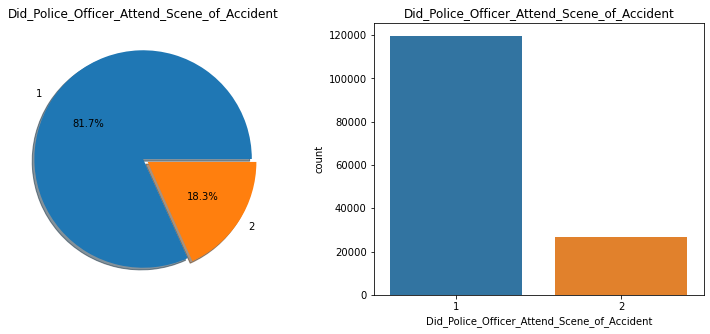

In [6]:
f,ax=plt.subplots(1,2,figsize=(13,5))
frame[target].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(target)
ax[0].set_ylabel('')
sns.countplot(target,data=frame,ax=ax[1])
ax[1].set_title(target)
plt.show()

In [7]:
#find dstribution of these values
cnt = frame[target].value_counts().to_dict()
print (cnt)

{1: 119607, 2: 26715}


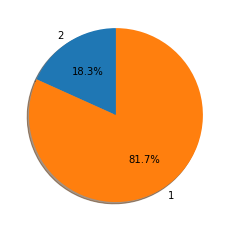

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = unique_vales
sizes = [cnt[k] for k in unique_vales]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [9]:
# see how many unique values each field has, to get a feeling for which fields needs to be
#strictly treated as numerical or categorical

for index,column_name in enumerate(colnames): # for each column in the frame
    unqiue_values_of_col_x=frame[column_name].unique() # retrieve unique values as an array
    print (" field %s with index %d has %d unique values " % (column_name,index, len(unqiue_values_of_col_x) ))

 field Accident_Index with index 0 has 146322 unique values 
 field Location_Easting_OSGR with index 1 has 92575 unique values 
 field Location_Northing_OSGR with index 2 has 96296 unique values 
 field Longitude with index 3 has 138878 unique values 
 field Latitude with index 4 has 137376 unique values 
 field Police_Force with index 5 has 51 unique values 
 field Accident_Severity with index 6 has 3 unique values 
 field Number_of_Vehicles with index 7 has 14 unique values 
 field Number_of_Casualties with index 8 has 26 unique values 
 field Date with index 9 has 365 unique values 
 field Day_of_Week with index 10 has 7 unique values 
 field Time with index 11 has 1439 unique values 
 field Local_Authority_(District) with index 12 has 380 unique values 
 field Local_Authority_(Highway) with index 13 has 207 unique values 
 field 1st_Road_Class with index 14 has 6 unique values 
 field 1st_Road_Number with index 15 has 4384 unique values 
 field Road_Type with index 16 has 6 unique 

                  mean  count
Police_Force                 
1             1.174519  25682
3             1.236936   1397
4             1.000000   3879
5             1.185094   2831
6             1.124126   4004
7             1.206135   2673
10            1.256723   3198
11            1.268116   1242
12            1.181238   2036
13            1.194527   5043
14            1.168876   3168
16            1.251766   2689
17            1.240720    889
20            1.264680   5603
21            1.182208   2799
22            1.216588   2327
23            1.142166   1653
30            1.254167   2400
31            1.255903   2880
32            1.163628   2194
33            1.160145   2479
34            1.178324   1301
35            1.215227   2049
36            1.150372   1882
37            1.135150   1761
40            1.196576   1577
41            1.190205   2634
42            1.167598   4117
43            1.178670   5429
44            1.186658   4527
45            1.178950   3962
46        

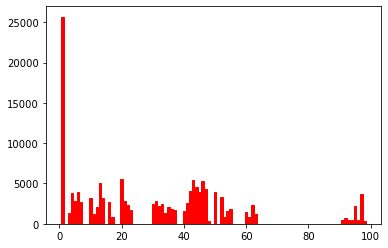

                       mean   count
Accident_Severity                  
1                  1.012063    1658
2                  1.093877   20676
3                  1.199648  123988


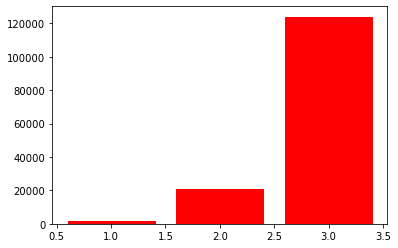

                        mean  count
Number_of_Vehicles                 
1                   1.168840  43171
2                   1.207987  88592
3                   1.079795  11329
4                   1.036550   2435
5                   1.009381    533
6                   1.006369    157
7                   1.000000     54
8                   1.030303     33
9                   1.000000      8
10                  1.000000      6
11                  1.000000      1
13                  1.000000      1
19                  1.000000      1
21                  1.000000      1


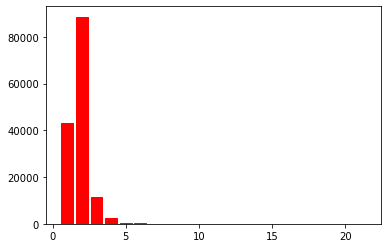

                 mean  count
Day_of_Week                 
1            1.147930  15940
2            1.187977  21093
3            1.195896  22318
4            1.198109  22210
5            1.189256  21780
6            1.185351  23960
7            1.160717  19021


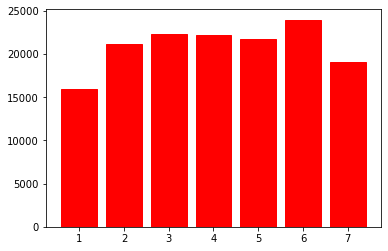

                    mean  count
1st_Road_Class                 
1               1.074152   5246
2               1.078125    384
3               1.162529  67828
4               1.175201  18573
5               1.183515  12969
6               1.233241  41322


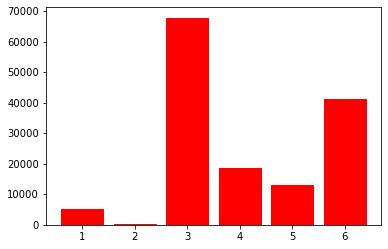

               mean   count
Road_Type                  
1          1.254429   10329
2          1.269165    2935
3          1.127935   20823
6          1.183207  110187
7          1.166018    1542
9          1.375494     506


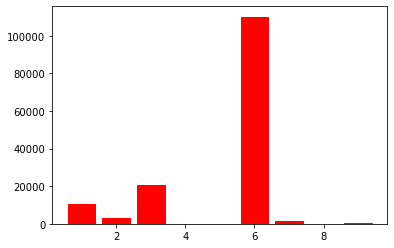

                 mean  count
Speed_limit                 
20           1.286717   3418
30           1.222218  94997
40           1.143713  12017
50           1.088149   5797
60           1.083034  20016
70           1.071946  10077


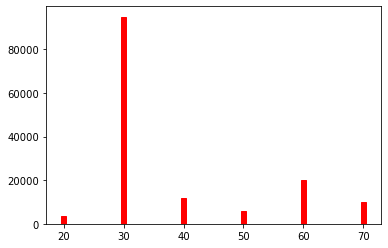

                     mean  count
Junction_Detail                 
0                1.163074  56410
1                1.264393  13253
2                1.234663   1956
3                1.189257  48014
5                1.114052   2078
6                1.159057  14586
7                1.183874   1017
8                1.199728   5883
9                1.175040   3125


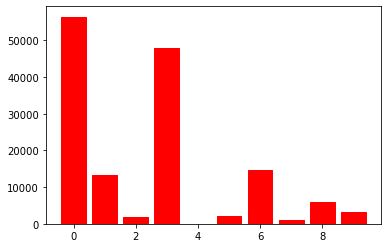

                      mean  count
Junction_Control                 
-1                1.162998  56467
 1                1.205000    200
 2                1.204937  15273
 3                1.202177    643
 4                1.192707  73739


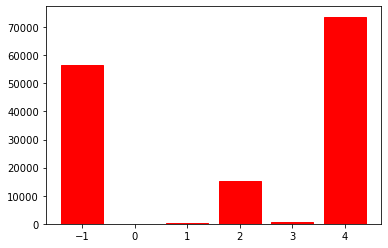

                    mean  count
2nd_Road_Class                 
-1              1.163953  56998
 1              1.144444    990
 2              1.130000    100
 3              1.241767  14514
 4              1.197861   5984
 5              1.158269   6887
 6              1.187858  60849


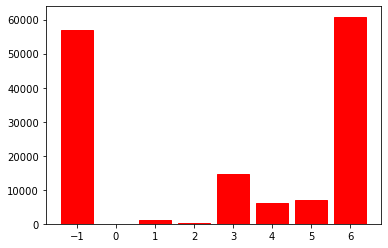

                                       mean   count
Pedestrian_Crossing-Human_Control                  
0                                  1.182427  145538
1                                  1.234604     341
2                                  1.191874     443


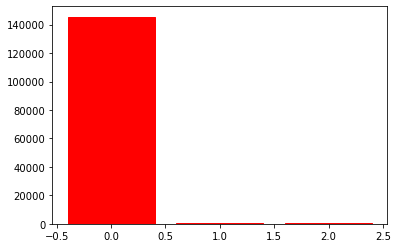

                                             mean   count
Pedestrian_Crossing-Physical_Facilities                  
0                                        1.176982  118108
1                                        1.244523    4519
4                                        1.213699    8526
5                                        1.195249   11324
7                                        1.204409     499
8                                        1.170950    3346


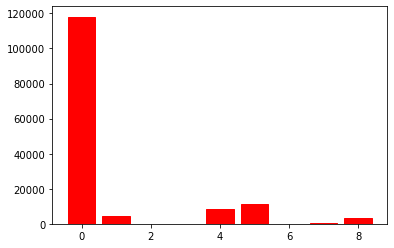

                      mean   count
Light_Conditions                  
1                 1.192910  108071
4                 1.164083   28449
5                 1.138761     872
6                 1.058203    7199
7                 1.380705    1731


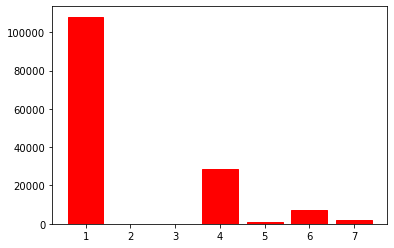

                        mean   count
Weather_Conditions                  
1                   1.182454  118879
2                   1.142655   17665
3                   1.154185     227
4                   1.136508    1575
5                   1.126447    2333
6                   1.141026      78
7                   1.114210     753
8                   1.183105    2332
9                   1.579032    2480


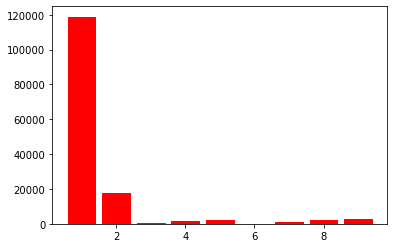

                             mean   count
Road_Surface_Conditions                  
-1                       1.801802     222
 1                       1.201708  102019
 2                       1.137354   41921
 3                       1.174757     206
 4                       1.087470    1692
 5                       1.064885     262


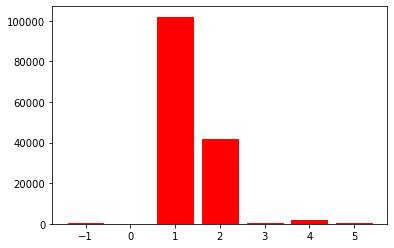

                                mean   count
Special_Conditions_at_Site                  
-1                          2.000000       1
 0                          1.183641  143116
 1                          1.146119     219
 2                          1.055556      54
 3                          1.082126     207
 4                          1.165173    1562
 5                          1.110215     372
 6                          1.092269     401
 7                          1.112821     390


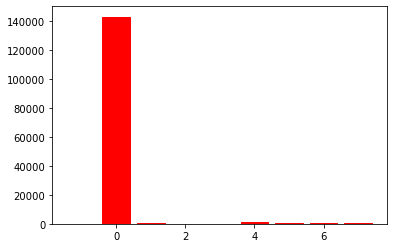

                         mean   count
Carriageway_Hazards                  
-1                   2.000000       1
 0                   1.183282  143909
 1                   1.174497     149
 2                   1.137380     939
 3                   1.071429     182
 6                   1.213333     450
 7                   1.106936     692


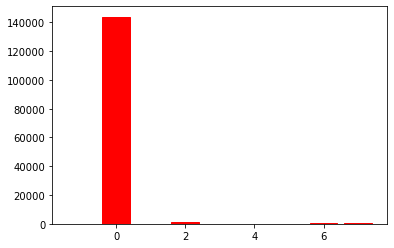

                         mean  count
Urban_or_Rural_Area                 
1                    1.216187  96287
2                    1.117897  50035


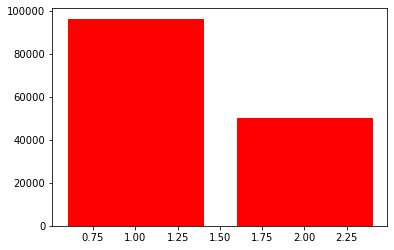

In [10]:
# I need to make certain there is no field that would compromise my modelling 
#(e.g that kind of tells whether police came over)
# I will examine a handfull with small number of unique classes < =50

few_unique_values=["Police_Force","Accident_Severity","Number_of_Vehicles","Day_of_Week","1st_Road_Class","Road_Type",
"Speed_limit","Junction_Detail","Junction_Control","2nd_Road_Class","Pedestrian_Crossing-Human_Control",
"Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions","Road_Surface_Conditions",
"Special_Conditions_at_Site","Carriageway_Hazards","Urban_or_Rural_Area"]

for index,column_name in enumerate(few_unique_values): # for each column in the frame
    #print (" field %s  has %d unique values " % (column_name ))
    aggregate_frame=frame[target].groupby(frame[column_name]).agg(['mean', 'count'])
    print(aggregate_frame)

    barlist=plt.bar(aggregate_frame.index.values, aggregate_frame['count'].values)
    for i in range (0,len(aggregate_frame.index.values)):
        barlist[i].set_color([max(0,min(1,(aggregate_frame['mean'].iloc[i]-0.72)*8)),max(0,min(1,(1-aggregate_frame['mean'].iloc[i]-0.72)*8)),0.0]) # this parts tries to link probability to visit with color (e.g. more red --> higher probability)
    plt.show()

#aggregate_frame
#print(aggregate_frame["count"].iloc[0])
#print(aggregate_frame.index.values[0])
# After a quick look and field cross-checking with the dictionary, I dont see anything that would compromise the modelling
# The only thing that it was hard to believe , is that Police Force =4 Lancashire had a police attending all the 3879 an accident happened 
#yet again, they have some good reputation ! http://lancashire-pcc.gov.uk/latest-news/lancashire-force-named-one-of-best-in-country-again/
# Results make great sense actually

           mean  count
Month                 
1      1.190551  12086
2      1.196846  10780
3      1.190516  11915
4      1.178325  11008
5      1.179550  12303
6      1.186403  12532
7      1.180408  13026
8      1.160307  12108
9      1.182640  11832
10     1.178290  13450
11     1.190095  13246
12     1.178132  12036


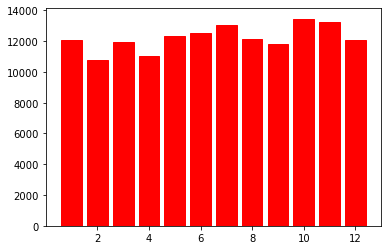

         mean  count
Day                 
1    1.181019   4889
2    1.179720   4507
3    1.195003   4923
4    1.186752   5012
5    1.183531   4724
6    1.184805   4870
7    1.180744   5079
8    1.174744   5076
9    1.190955   4975
10   1.189215   5137
11   1.188360   5017
12   1.183128   4860
13   1.174561   5236
14   1.177200   4921
15   1.191453   4727
16   1.189491   4834
17   1.186406   4914
18   1.181534   4798
19   1.187289   4736
20   1.178085   4627
21   1.178422   4792
22   1.174759   4778
23   1.178172   4563
24   1.182977   5099
25   1.178435   4702
26   1.168263   4386
27   1.178029   4606
28   1.182237   4774
29   1.179297   4183
30   1.189801   4020
31   1.185373   2557


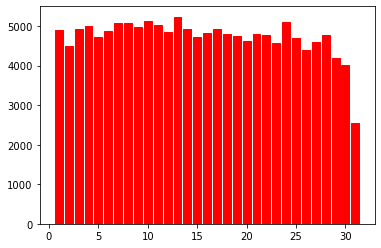

          mean  count
Hour                 
0     1.100744   2015
1     1.111883   1439
2     1.096685   1086
3     1.094360    922
4     1.080247    810
5     1.136223   1292
6     1.160581   2821
7     1.182898   6736
8     1.215238  10723
9     1.183643   7373
10    1.170979   6802
11    1.174522   7850
12    1.191692   8811
13    1.190454   8716
14    1.190535   8833
15    1.212847  11271
16    1.196075  11924
17    1.202867  13324
18    1.199069  10529
19    1.171037   7513
20    1.158003   5348
21    1.150000   4080
22    1.123988   3460
23    1.113086   2644


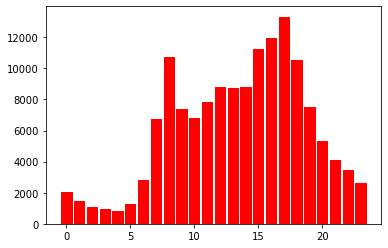

In [11]:
#Another concern is time . Ideally a model built in 2014 should be able to predict the future 
# That is make good predictions for 2015 onward. Therefore that temporal element would need to be respected when validating the model.
# However there are certain conditions (such as weather conditions) that occur only certain times in a year. e.g. when
# there is fog or mist (weather =7) probability of attending is much higher. Slightly less with snow or rain. 
# The concern is , building a model on January - August and (lets say) testing it on the last part of the year might give misleading results , as this period is fairly different.
# Best scenario would have been to have a whole new (future) year to use as a validation and even later (+2 years) for a test.
# In any case lets see the distribution of probbaility to attend and also create some daytime related fields


frame['Month']=[int(d.split('/')[1]) for d in frame.Date]
frame['Day']=[int(d.split('/')[0]) for d in frame.Date]
frame['Hour']=[int(d.split(':')[0]) for d in frame.Time]
frame[['Date','Month','Day','Hour','Time']].head(5)

for index,column_name in enumerate(['Month','Day','Hour']): # for each column in the frame
    #print (" field %s  has %d unique values " % (column_name ))
    aggregate_frame=frame[target].groupby(frame[column_name]).agg(['mean', 'count'])
    print(aggregate_frame)
    
    barlist=plt.bar(aggregate_frame.index.values, aggregate_frame['count'].values)
    for i in range (0,len(aggregate_frame.index.values)):
        barlist[i].set_color([max(0,min(1,(aggregate_frame['mean'].iloc[i]-0.72)*8)),max(0,min(1,(1-aggregate_frame['mean'].iloc[i]-0.72)*8)),0.0])
    plt.show()


# inetersting to see that Police presense is bigger in later (or very early) hours . 
#It may be related with availability or seriousness of accidents
# distribution of police-appearence rate is not much different among months which actully puts my worries at ease. 
# I would persume that A model optimsed to predict well a case from all months would scale well in the next year (e.g it should not overfit)

In [12]:
# there are still some concerns about fields , Location_Easting_OSGR, Location_Northing_OSGR ,LSOA_of_Accident_Location
# they have many unique values and based on their definition, are unlikely to yield more informtion already encapsulated in lat,lon

#columns with many unique values (>50)

columns_many_uniques=["Local_Authority_(District)","Local_Authority_(Highway)","1st_Road_Number","2nd_Road_Number"]

#I could use a sparse represantation (after converting the unqiue values to dummines-binary features), however
# counts should work quite well with the type of model I intend to use (tree-based) which could cature nonlinearities fairly well
# based on this , I could convert these fields via replacing their values with their respective counts
# in other words the variables would represent "is it a popular district"? instead of which district it is
# This way we reduce model complexity , commonly not losing information (if not getting better)


for index,column_name in enumerate(columns_many_uniques): # for each column in the selected list for counts' conversion
        print (column_name)#, len(np.unique(frame[column_name])))    
        counters = frame[column_name].value_counts().to_dict()    
        frame[column_name].replace(counters, inplace=True)    
        
frame[columns_many_uniques].head(5)

Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Number
2nd_Road_Number


,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Number,2nd_Road_Number
0,712,712,306,114691
1,712,712,52,64
2,712,712,349,114691
3,712,712,38815,114691
4,712,712,1388,271


In [13]:
#dropping fields I will not use
drop_fields=["Accident_Index","Location_Easting_OSGR", "Location_Northing_OSGR","LSOA_of_Accident_Location" ,"Date", "Time" ]
print ("before removal: " , frame.shape)
#print(frame.columns.values)
#after
frame.drop(drop_fields,axis=1, inplace=True)
print ("After removal: " , frame.shape)
#separate target 
y= np.array(frame[target].values)
#check
print (np.mean(y), np.sum(y), len(y))
frame.drop(target, axis=1, inplace=True)  
print ("After target removal: " , frame.shape)

before removal:  (146322, 35)
After removal:  (146322, 29)
1.1825767827121008 173037 146322
After target removal:  (146322, 28)


In [14]:
# create dummies for (or binarize) variables that dont have any logical numerical relationship with the target
########This field gets commented out as converting to dummies gave worse results##############
"""
cols_to_be_binarized=["Police_Force","Road_Type","Junction_Detail","Junction_Control","2nd_Road_Class",
                      "Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions"]

for index,column_name in enumerate(cols_to_be_binarized): # for each column in the selected list for dummies
    
    frames=pd.get_dummies(frame[column_name], drop_first=True)
    frame = pd.concat([frame, frames], axis=1) # merging frames
    print ("columns shape after binarizing %s is %d "  % ( column_name,frame.shape[1]))
    
#drop initial columns used for the dummies

frame.drop(cols_to_be_binarized,axis=1, inplace=True)
print ("After removin cols_to_be_binarized : " , frame.shape)
"""

'\ncols_to_be_binarized=["Police_Force","Road_Type","Junction_Detail","Junction_Control","2nd_Road_Class",\n                      "Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions"]\n\nfor index,column_name in enumerate(cols_to_be_binarized): # for each column in the selected list for dummies\n    \n    frames=pd.get_dummies(frame[column_name], drop_first=True)\n    frame = pd.concat([frame, frames], axis=1) # merging frames\n    print ("columns shape after binarizing %s is %d "  % ( column_name,frame.shape[1]))\n    \n#drop initial columns used for the dummies\n\nframe.drop(cols_to_be_binarized,axis=1, inplace=True)\nprint ("After removin cols_to_be_binarized : " , frame.shape)\n'